# Concept of Vectorization

We generally use either Bag of Words or TF-IDF
1. Bag of words Builds a vocabulary of all words in the corpus
It only stores word counts.
Limitations
- Common words ("the", "is") get too much weight
- Longer documents get bigger counts
- Doesn’t capture importance or rarity of words

2. TF-IDF assigns higher importance to rare, meaningful words, and reduces weight for common words.

Formula:
- TF = term frequency
“How often does word appear in THIS document?”
- IDF = inverse document frequency
“How rare is this word across ALL documents?”

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = "/Users/venkatchandan/Desktop/ML_Projects/BasicProjects/FakeNewsDetection/data/News _dataset"  

true_path = os.path.join(DATA_DIR, "True.csv")
fake_path = os.path.join(DATA_DIR, "Fake.csv")

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

true_df['label'] = 1
fake_df['label'] = 0
df = pd.concat([true_df,fake_df],ignore_index = True)

In [4]:
from sklearn.model_selection import train_test_split
X = df['text'].astype(str)
y = df['label'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words="english",
    max_df=0.7,       # ignore very common words
    min_df=5,         # ignore very rare words
    ngram_range=(1,2) # use unigrams + bigrams
)
# what does ngram do?



In [6]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((35918, 246563), (8980, 246563))

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    max_iter=200,
    solver="liblinear",
    class_weight="balanced"   # handles slight class imbalance
)

model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=200, solver='liblinear')

In [8]:
y_pred = model.predict(X_test_tfidf)

In [10]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Accuracy: 0.9868596881959911
Precision: 0.9826227988878591
Recall: 0.9899626517273576
F1 Score: 0.9862790697674418

Classification Report:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4696
        Real       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



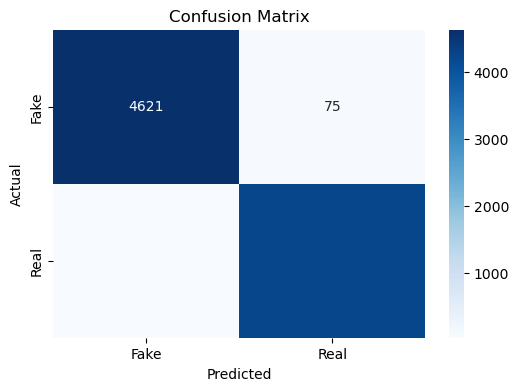

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "Real"],
            yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
